<a href="https://colab.research.google.com/github/Shantnu-Poonia/E-commerce-Landing-page/blob/main/Copy_of_kaggle_upload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spotify Regression Problem 2024**
Team name = Group 21

Shantnu Poonia - RegNo. 202472260

Mitesh Gandhi - RegNo. 202483203

Harsh Vashishtha - RegNo. 202479762

Rhythm Singh Pawaria - RegNo. 202458483

Ronak Dahani - RegNo.

**Kaggle Competiton - CS985 Spotify Regression Problem 2024**

> Your task for this part of the class assignment is to build a model to predict the popularity of a song. The data is drawn from here: https://www.kaggle.com/cnic92/spotify-past-decades-songs-50s10s. The only change that has been made is to the first column where "Number" has been re-named as "Id". Also note the points that "There are some missing values, and the year is not always coherent due to some re-releases etc." However, not all the data has been used so make sure you download the training data from this (the competition) page.


> Your challenge is to build a good machine learning model that is able to predict the popularity of a song. Popularity is an integer value so treat this as a regression problem. Ignoring Id and Popularity (named "pop") there are 13 other attributes in the dataset that you may use to build your model. Use as many or as few of these as you like, but remember to spend time exploring, understanding and cleaning the data. The performance of the model will be determined by the RMSE.

From the competition [description](https://www.kaggle.com/competitions/cs9856-spotify-regression-problem-2024/overview/description)



**Goal of this Notebook:**

Create a machine learning model that predicts song popularity. We have a Kaggle dataset with 13 characteristics for each song, removing "Id" and "Popularity" (renamed "pop"). To improve the performance of our model, we will focus on data cleaning, exploration, and feature selection.

**Used Libraries**


*   [Numpy](http://www.numpy.org/)

*   [Pandas](http://pandas.pydata.org/)
*   [Matplotlib](http://matplotlib.org/)


*   [Scikit-learn](https://scikit-learn.org/stable/)


*   [Seaborn](https://seaborn.pydata.org/)
*   [Math](https://docs.python.org/3/library/math.html)





In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

# Data Handling

Let's import the training and testing data into data frames (df and test_df) using the pandas "read_csv" function.

The id column has been separated from the rest of the test data, so it may be combined with the popularity generated by the model.



In [22]:
df=pd.read_csv('CS98XRegressionTrain.csv')

In [23]:
test_df=pd.read_csv('/content/CS98XRegressionTest.csv')
test_ids = test_df['Id']

Display an overview of our data

In [24]:
df.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


In [25]:
# The '.shape' function returns the dimensions of the DataFrame
df.shape

(453, 15)

Let's get some information about the data

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


**The key information obtained by looking at the data:**


*   There are 453 songs to analyze

*  Our dataset has 15 columns which are also known as features or attributes

*   The info function gives us an overview about the data in each column

    > For example: Let's consider our target attribute(pop).
    'pop' column has 453 entries and out of all these not a single on of them is Null. Also the data is stored in an 'int64' datatype

*   There are some missing values in 'top genre' column
> `top genre  438 non-null    object`

*  `dtypes: int64(12), object(3)`

 This tels us that the values/data of 3 features are stored in an 'object' data type and rest of the features are stored in an 'int64'



# Looking for some trends in data

In [27]:
trend_df = df[['pop','bpm','year','nrgy','acous', 'dur', 'dB', 'spch', 'live', 'val']]
trend_df = trend_df.sort_values(by=['pop'], ascending=[False])
trend_df.head(10)

,pop,bpm,year,nrgy,acous,dur,dB,spch,live,val
294,84,71,1975,40,27,354,-10,5,30,22
234,83,146,2002,44,73,310,-7,2,11,21
263,83,93,1982,37,26,296,-18,3,5,73
337,82,129,1969,54,3,186,-10,3,18,39
162,82,110,1980,53,11,215,-6,16,16,75
427,81,110,2003,86,0,186,-4,4,64,24
229,81,138,2005,42,16,296,-9,3,11,12
374,81,137,1972,53,43,282,-9,3,9,34
441,81,110,1983,59,20,184,-11,6,9,83
346,80,119,1987,82,21,291,-9,5,9,87


In [28]:
trend_df.tail(10)

,pop,bpm,year,nrgy,acous,dur,dB,spch,live,val
87,30,199,2019,73,37,122,-11,14,73,72
35,30,125,2000,33,87,108,-10,3,9,68
57,30,75,2000,14,70,135,-14,3,14,26
90,29,109,2008,29,36,172,-15,4,16,63
26,28,97,2016,16,100,181,-16,5,11,15
72,28,83,2006,53,59,135,-9,3,34,80
265,27,93,2015,62,55,120,-7,4,25,86
252,27,142,2012,38,43,146,-8,3,13,69
357,26,109,1953,65,79,146,-2,3,14,85
330,26,137,2012,36,64,165,-15,4,25,28


**Upon sorting the data based on popularity, we can identify some trends:**


*   The popularity value decreases with increasing acoustic value.

*   Longer durations corresponds to higher popularity values

*   Additionally, we noticed an extremely intriguing trend:
Songs released before 2000 have a higher popularity than songs released after that year. However, this data contains a few notable exceptions, so we need to determine whether popularity and year have any sort of correlation before we can separate the data into before and after 2000.




# Exploratory Data Analysis

First we need to check if our data contains outliers

In [ ]:
plt.figure(figsize=(16, 10))

for i in range(len(df.columns)): #iterate each column
    plt.subplot(3, 5, i + 1)
    sns.boxplot(df[df.columns[i]]) #plot each column

plt.show()

There are some outliers present in the 'dnce', 'dB'. Also the data present in 'live', 'spch' is not well distributed. We need to take care of these in pre processing.

Let's dive deep into the corelation between popularity and other features using visual tools like Heatmap.

<ipython-input-10-239b68d7df5e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='icefire');


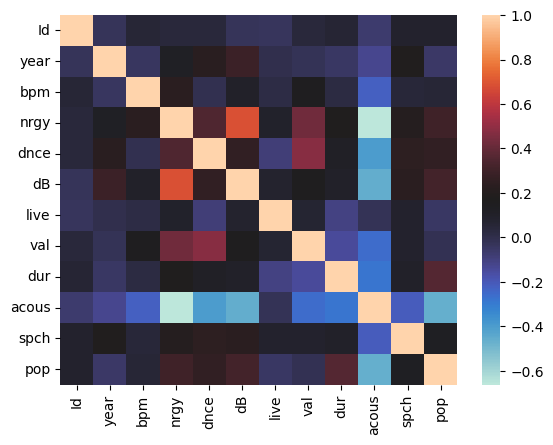

In [ ]:
# The heatmap shows us the degree of corelation (using the color scheme) between different numeric variables
sns.heatmap(df.corr(), cmap='icefire');

Based on the heatmap, we can deduce that the only variables that significantly positively correlate with popularity are duration ('dur'), loudness ('dB'), and energy ('nrgy'). Acoustic ('acous') and popularity are also related but in inverse fashion.

This time, we use numbers to determine whether or not our hypotheses are true.

In [ ]:
df.corr()['pop'].sort_values(ascending=False)

<ipython-input-11-d41e0bc36e4f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['pop'].sort_values(ascending=False)


pop      1.000000
dur      0.363266
dB       0.316854
nrgy     0.303797
dnce     0.258670
spch     0.130955
Id       0.086837
bpm      0.055024
val     -0.018713
live    -0.051364
year    -0.054293
acous   -0.465875
Name: pop, dtype: float64

"Boom! Hypothesis validated! We're crushing it!" 🚀😄

The data clearly show that, while acoustic has a high negative value, duration, loudness, and energy have good correlations with popularity.

Additionally, we can see that year's influence is negligible. On the other hand, we noticed a break in the data about 2000 when examining the data. Thus, we shall include the year in our analysis.


Following this phase, we looked for another trait that, with the aid of already-existing features, might have a stronger correlation with popularity.
The existing available features "dur," "dnce," and "nrgy" were multiplied to create the two new features we introduced, "dur_dnce" and "dur_nrgy." Although the correlation value was greater than the current ones, the model did not perform well when trained using these features. Therefore, we made the decision to keep the current features and eliminate the new ones in order to increase the model's efficiency.

# Data Visualtisation

We will use visual tools to examine the data distribution and attempt to identify some broad themes in the data.

In [ ]:
Z = df.acous

fig,axs = plt.subplots(2,1, figsize=(7,7))
fig.suptitle('Observations of popularity')

axs[0].set_title('Distribution of acoustic')
sns.distplot(df['acous'], ax=axs[0], kde=False)

axs[1].set_title('Relationship between popularity and acoustic')
sns.lineplot(x='pop', y='acous', data=df, ax=axs[1])

fig.tight_layout(pad=3.0)

In [ ]:
Z1 = df.dur

fig,axs = plt.subplots(2,1, figsize=(7,7))
fig.suptitle('Observations of popularity')

axs[0].set_title('Distribution of duration')
sns.distplot(df['dur'], ax=axs[0], kde=False)

axs[1].set_title('Relationship between popularity and duration')
sns.lineplot(x='pop', y='dur', data=df, ax=axs[1])

fig.tight_layout(pad=3.0)

It can be clearly seen that there is no general trend in the features, also the data distribution of the attributes is not appropriate .

# Data Pre-processing

As we work with the data, let's get it ready to be fed into the model in the following stage.

In [29]:
# make a copy of data so that the original dataframe is not affected
test_df = test_df.copy()
# drop the features in order to match with the training file
test_df = test_df.drop(['title', 'artist', 'top genre', 'spch', 'live'], axis=1)

In [30]:
scaler = StandardScaler()
scaler.fit(test_df)
test_df = pd.DataFrame(scaler.transform(test_df), index= test_df.index, columns=test_df.columns)

Scaler: It takes each feature and scales it to a mean of 0 and a standard deviation of 1, putting them all on an equal footing.

In [31]:
def preprocess_inputs(df):
  df = df.copy()
  # drop the features with lower corelation values
  #another reason to drop spch is that when we plot the distribution graph above it showed that the spch data is biased
  df = df.drop(['title', 'artist', 'top genre','spch', 'live'], axis=1)

  # strip out the target attribute
  y = df['pop']
  X = df.drop('pop', axis=1)


  # split the dataframe into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)


  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
  X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)


  return X_train, X_test, y_train, y_test


The data is being divided into four portions in the preprocess_inputs function: X_train, X_test, y_train, and y_test, which will be supplied into the model.

In [32]:
#our training data is passed to the function to generate 4 sets out of it
X_train, X_test, y_train, y_test = preprocess_inputs(df)

In [ ]:
# variance value must be near to 1 which is exactly the case
X_train.var()

Id       1.00277
year     1.00277
bpm      1.00277
nrgy     1.00277
dnce     1.00277
dB       1.00277
val      1.00277
dur      1.00277
acous    1.00277
dtype: float64

In [ ]:
# after applying the standard scaler the values reduced drastically. Bfore the standard scaler these values were much higher
X_train.mean()

Id      -2.821561e-17
year    -2.635093e-15
bpm     -2.085502e-17
nrgy     1.005948e-16
dnce     1.889219e-16
dB      -1.717472e-16
val      1.472119e-16
dur      1.594796e-16
acous    2.453532e-17
dtype: float64

# Supervised Machine Learning

**Let's now apply our model to forecast the values of the test set and store the output so that it can be uploaded to Kaggle.**


In [33]:
# created a function to get the desired output file
def print_output(model, test_df):
  test_predictions = model.predict(test_df)

  # by default the model was generating an array of popularity
  #to concatenate it to the series of test_ids we need to convert output array to series
  test = pd.Series(test_predictions)
  test
  #we need to have 2 columns in output file that needs to be uploaded on Kaggle
  #test_ids was created as soon as we imported the test file
  output_df = pd.concat([test_ids, test], axis=1)
  output_df.columns = ['Id', 'pop']

  output_df.to_csv("output.csv",index=False)
# during the testing phase we had to run multiple models so in order to  tackle code repetition we created this function

**Random Forest**

As explained by GeeksforGeeks :
>A random forest is an ensemble learning method that combines the predictions from multiple decision trees to produce a more accurate and stable prediction. It is a type of supervised learning algorithm that can be used for both classification and regression tasks.

>Every decision tree has high variance, but when we combine all of them in parallel then the resultant variance is low as each decision tree gets perfectly trained on that particular sample data, and hence the output doesn’t depend on one decision tree but on multiple decision trees. In the case of a classification problem, the final output is taken by using the majority voting classifier. In the case of a regression problem, the final output is the mean of all the outputs. This part is called Aggregation.


**Why this model, as explained by yours truly:**

* As we saw in the above graphs that there is no clear trend or pattern that we can work upon. Random Forest can help us in managing sophisticated correlations between features and the desired feature.

* In the EDA section while plotting the boxplot of each column we saw there are some outliers present in the 'dnce' and 'dB' and these features are used in model training which can affect the performance of the model. But random forest is our saviour as random forest is robust to outliers.

* As an ensemble learning technique, Random Forest combines the predictions of several decision trees to increase precision. When compared to individual decision trees, this can result in models that are more robust.


In [37]:
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)
val_preds2 = rf_model.predict(X_test)
print_output(rf_model, test_df)

rms1 =sqrt(mean_squared_error(y_test, val_preds2))
print(f'Root mean squared error: {rms1:.3f}')

Root mean squared error: 10.675


In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

val_preds3 = model.predict(X_test)

rms2 =sqrt(mean_squared_error(y_test, val_preds3))
print(f'Root mean squared error: {rms2:.3f}')

Root mean squared error: 10.880


In [36]:
dec_tree = DecisionTreeRegressor(random_state=0)
dec_tree.fit(X_train, y_train)
val_preds1 = dec_tree.predict(X_test)

print_output(dec_tree, test_df)

rms =sqrt(mean_squared_error(y_test, val_preds1))
print(f'Root mean squared error: {rms:.3f}')

Root mean squared error: 13.876


# Model Performances

**Random Forest Regressor:**

>Root Mean square error: 10.675

**Decision Tree Regressor:**

>Root Mean square error: 13.876

**Linear Regression:**

>Root Mean square error: 10.880

<br>

We selected Random forest regressor because of its low root mean square error when compared to other models implemented.


# Kaggle Score for Random forest regressor:

7.33337